In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (12, 8)

### 1. 다음 데이터를 잘 표현하는 회귀 모델을 찾으시오.

$$y = f(x)$$

In [2]:
data = np.load('./nn_reg1.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

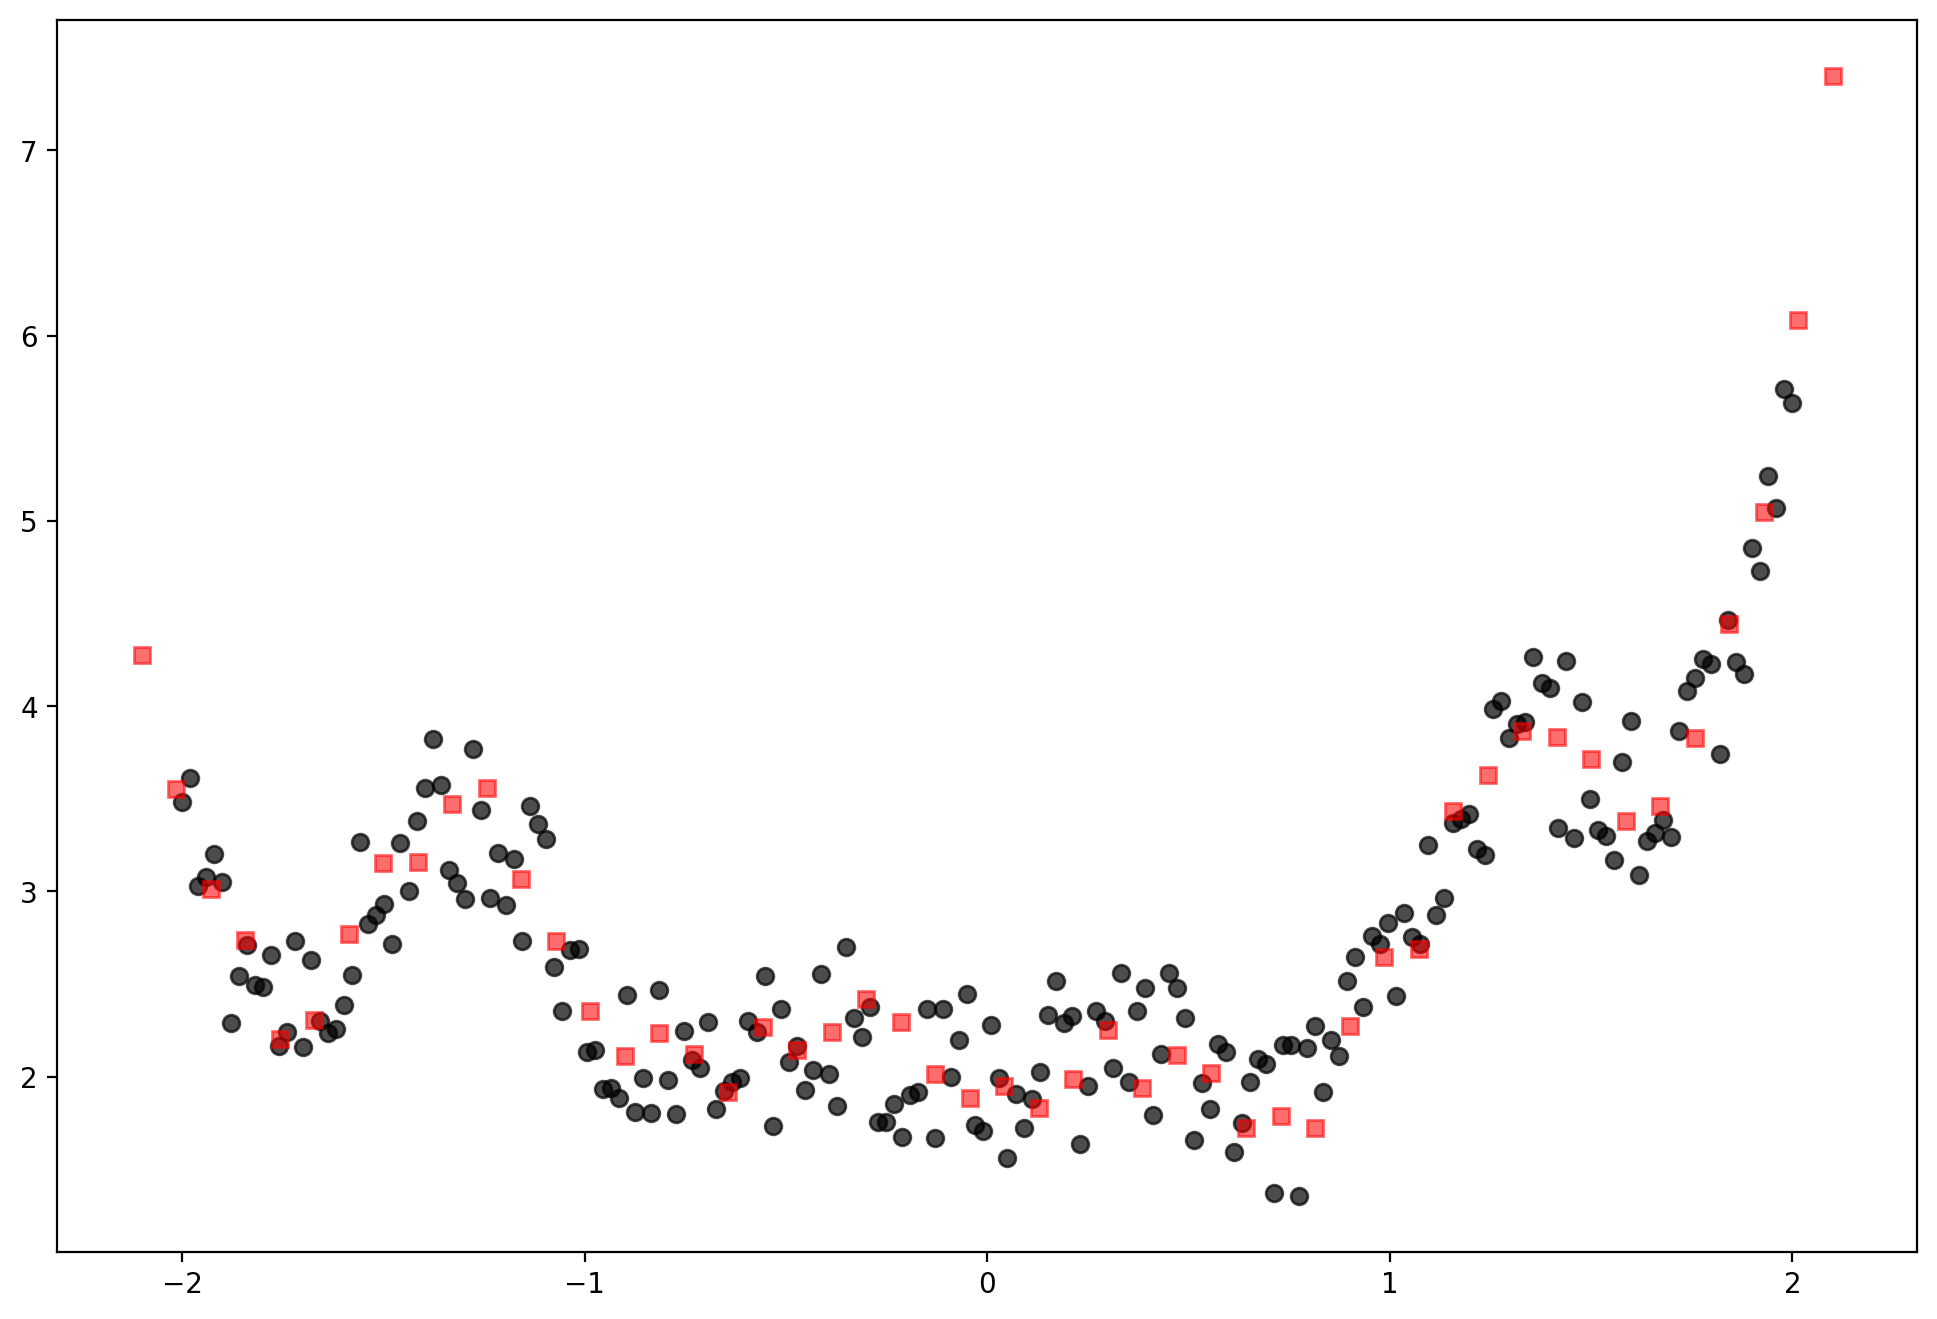

In [3]:
plt.plot(x_train,y_train,'ok', alpha = 0.7)
plt.plot(x_test,y_test,'rs', alpha=0.57)

In [4]:
features = np.array([[xval] for xval in x_train])
labels = np.array([[yval] for yval in y_train])

class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 3000
        num_hidden2 = 3000
        num_hidden3 = 3000
        num_hidden4 = 3000
        
        self.W1 = tf.Variable(tf.random.normal([1,num_hidden1], seed = 2023), name ='weight1')
        self.b1 = tf.Variable(tf.zeros([num_hidden1]), name = 'bias1')
        
        self.W2 = tf.Variable(tf.random.normal([num_hidden1,num_hidden2], seed = 2023), name ='weight2')
        self.b2 = tf.Variable(tf.zeros([num_hidden2]), name = 'bias2')
        
        self.W3 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight3')
        self.b3 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias3')
        
        self.W4 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight4')
        self.b4 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias4')
        
        self.W5 = tf.Variable(tf.random.normal([num_hidden2,1], seed = 2023), name ='weight5')
        self.b5 = tf.Variable(tf.zeros([1]), name = 'bias5')
    
    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)
        
        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)
        
        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.sigmoid(l3)
        
        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        yhat = tf.matmul(h4, self.W5) + self.b5
        return yhat


In [14]:
Epochs = 2000
batch_size = 512
lr = 0.001
optimizer = tf.keras.optimizers.legacy.Adagrad(lr)
loss = tf.keras.losses.MeanSquaredError()

In [15]:
np.random.seed(20)
shuffled_Id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_Id)
shuffled_x_train = features[shuffled_Id]
shuffled_y_train = labels[shuffled_Id]

In [16]:
model = MyModel()

In [17]:
model.compile(optimizer=optimizer, loss=loss)

In [18]:
data3 = np.load('./pb3.npz')
x_train3 = data3['x_train']
y_train3 = data3['y_train']
z_train3 = data3['z_train']
target = data3['target'] # t

In [19]:
history = model.fit(shuffled_x_train, shuffled_y_train, epochs = Epochs, batch_size = batch_size, shuffle = False, verbose='auto')

Epoch 1/2000
1/1 [==============================] - 0s 240ms/step - loss: 9088.7773
Epoch 2/2000
1/1 [==============================] - 0s 105ms/step - loss: 321.4630
Epoch 3/2000
1/1 [==============================] - 0s 105ms/step - loss: 214.4806
Epoch 4/2000
1/1 [==============================] - 0s 106ms/step - loss: 149.0616
Epoch 5/2000
1/1 [==============================] - 0s 108ms/step - loss: 101.1021
Epoch 6/2000
1/1 [==============================] - 0s 109ms/step - loss: 64.1636
Epoch 7/2000
1/1 [==============================] - 0s 103ms/step - loss: 25.5057
Epoch 8/2000
1/1 [==============================] - 0s 104ms/step - loss: 8.6734
Epoch 9/2000
1/1 [==============================] - 0s 104ms/step - loss: 2.8382
Epoch 10/2000
1/1 [==============================] - 0s 103ms/step - loss: 1.5627
Epoch 11/2000
1/1 [==============================] - 0s 103ms/step - loss: 0.9616
Epoch 12/2000
1/1 [==============================] - 0s 104ms/step - loss: 0.6410
Epoch 13/200

1/1 [==============================] - 0s 114ms/step - loss: 0.0221
Epoch 101/2000
1/1 [==============================] - 0s 114ms/step - loss: 0.0220
Epoch 102/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0219
Epoch 103/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0217
Epoch 104/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0216
Epoch 105/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0215
Epoch 106/2000
1/1 [==============================] - 0s 117ms/step - loss: 0.0214
Epoch 107/2000
1/1 [==============================] - 0s 115ms/step - loss: 0.0213
Epoch 108/2000
1/1 [==============================] - 0s 114ms/step - loss: 0.0212
Epoch 109/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0211
Epoch 110/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0210
Epoch 111/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0209
Epoch 112/2000
1/1 

1/1 [==============================] - 0s 108ms/step - loss: 0.0160
Epoch 199/2000
1/1 [==============================] - 0s 109ms/step - loss: 0.0160
Epoch 200/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0159
Epoch 201/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0159
Epoch 202/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0159
Epoch 203/2000
1/1 [==============================] - 0s 109ms/step - loss: 0.0158
Epoch 204/2000
1/1 [==============================] - 0s 108ms/step - loss: 0.0158
Epoch 205/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0158
Epoch 206/2000
1/1 [==============================] - 0s 106ms/step - loss: 0.0157
Epoch 207/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0157
Epoch 208/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0157
Epoch 209/2000
1/1 [==============================] - 0s 108ms/step - loss: 0.0156
Epoch 210/2000
1/1 

1/1 [==============================] - 0s 111ms/step - loss: 0.0138
Epoch 297/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0137
Epoch 298/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0137
Epoch 299/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0137
Epoch 300/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0137
Epoch 301/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.0137
Epoch 302/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0137
Epoch 303/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0136
Epoch 304/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0136
Epoch 305/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0136
Epoch 306/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0136
Epoch 307/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0136
Epoch 308/2000
1/1 

1/1 [==============================] - 0s 115ms/step - loss: 0.0125
Epoch 395/2000
1/1 [==============================] - 0s 114ms/step - loss: 0.0125
Epoch 396/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0124
Epoch 397/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0124
Epoch 398/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0124
Epoch 399/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.0124
Epoch 400/2000
1/1 [==============================] - 0s 115ms/step - loss: 0.0124
Epoch 401/2000
1/1 [==============================] - 0s 114ms/step - loss: 0.0124
Epoch 402/2000
1/1 [==============================] - 0s 116ms/step - loss: 0.0124
Epoch 403/2000
1/1 [==============================] - 0s 114ms/step - loss: 0.0124
Epoch 404/2000
1/1 [==============================] - 0s 115ms/step - loss: 0.0124
Epoch 405/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.0123
Epoch 406/2000
1/1 

1/1 [==============================] - 0s 126ms/step - loss: 0.0115
Epoch 493/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0115
Epoch 494/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0115
Epoch 495/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0115
Epoch 496/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0115
Epoch 497/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0115
Epoch 498/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0115
Epoch 499/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0115
Epoch 500/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0115
Epoch 501/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0115
Epoch 502/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0115
Epoch 503/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0115
Epoch 504/2000
1/1 

1/1 [==============================] - 0s 120ms/step - loss: 0.0109
Epoch 591/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0108
Epoch 592/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0108
Epoch 593/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 594/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 595/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 596/2000
1/1 [==============================] - 0s 118ms/step - loss: 0.0108
Epoch 597/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 598/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 599/2000
1/1 [==============================] - 0s 118ms/step - loss: 0.0108
Epoch 600/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0108
Epoch 601/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0108
Epoch 602/2000
1/1 

1/1 [==============================] - 0s 122ms/step - loss: 0.0103
Epoch 689/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0103
Epoch 690/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0103
Epoch 691/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0103
Epoch 692/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0103
Epoch 693/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0103
Epoch 694/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0103
Epoch 695/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0103
Epoch 696/2000
1/1 [==============================] - 0s 121ms/step - loss: 0.0103
Epoch 697/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0103
Epoch 698/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.0103
Epoch 699/2000
1/1 [==============================] - 0s 120ms/step - loss: 0.0102
Epoch 700/2000
1/1 

1/1 [==============================] - 0s 125ms/step - loss: 0.0099
Epoch 787/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0099
Epoch 788/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0098
Epoch 789/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0098
Epoch 790/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0098
Epoch 791/2000
1/1 [==============================] - 0s 121ms/step - loss: 0.0098
Epoch 792/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0098
Epoch 793/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0098
Epoch 794/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0098
Epoch 795/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0098
Epoch 796/2000
1/1 [==============================] - 0s 121ms/step - loss: 0.0098
Epoch 797/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0098
Epoch 798/2000
1/1 

1/1 [==============================] - 0s 125ms/step - loss: 0.0095
Epoch 885/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0095
Epoch 886/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0095
Epoch 887/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0095
Epoch 888/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0095
Epoch 889/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0095
Epoch 890/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0095
Epoch 891/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0095
Epoch 892/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0095
Epoch 893/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0095
Epoch 894/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0095
Epoch 895/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0095
Epoch 896/2000
1/1 

1/1 [==============================] - 0s 144ms/step - loss: 0.0092
Epoch 983/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0092
Epoch 984/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0092
Epoch 985/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0092
Epoch 986/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0092
Epoch 987/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.0092
Epoch 988/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0092
Epoch 989/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0092
Epoch 990/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0092
Epoch 991/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0092
Epoch 992/2000
1/1 [==============================] - 0s 147ms/step - loss: 0.0092
Epoch 993/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0092
Epoch 994/2000
1/1 

Epoch 1080/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0089
Epoch 1081/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0089
Epoch 1082/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1083/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1084/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0089
Epoch 1085/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0089
Epoch 1086/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1087/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1088/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1089/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0089
Epoch 1090/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089
Epoch 1091/2000
1/1 [==============================] - 0s 127ms/step - loss:

1/1 [==============================] - 0s 129ms/step - loss: 0.0087
Epoch 1178/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0087
Epoch 1179/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0087
Epoch 1180/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0087
Epoch 1181/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0087
Epoch 1182/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0087
Epoch 1183/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0087
Epoch 1184/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0087
Epoch 1185/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0087
Epoch 1186/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0087
Epoch 1187/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.0087
Epoch 1188/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0087
Epoch 11

1/1 [==============================] - 0s 136ms/step - loss: 0.0085
Epoch 1275/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0085
Epoch 1276/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0085
Epoch 1277/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0085
Epoch 1278/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0085
Epoch 1279/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0085
Epoch 1280/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0085
Epoch 1281/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0085
Epoch 1282/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0085
Epoch 1283/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0085
Epoch 1284/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0085
Epoch 1285/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.0085
Epoch 12

1/1 [==============================] - 0s 144ms/step - loss: 0.0083
Epoch 1372/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0083
Epoch 1373/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0083
Epoch 1374/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0083
Epoch 1375/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0083
Epoch 1376/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0083
Epoch 1377/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0083
Epoch 1378/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0083
Epoch 1379/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0083
Epoch 1380/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0083
Epoch 1381/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0083
Epoch 1382/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0083
Epoch 13

1/1 [==============================] - 0s 134ms/step - loss: 0.0082
Epoch 1469/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0082
Epoch 1470/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0082
Epoch 1471/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0082
Epoch 1472/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0082
Epoch 1473/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0082
Epoch 1474/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0082
Epoch 1475/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0081
Epoch 1476/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0081
Epoch 1477/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0081
Epoch 1478/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0081
Epoch 1479/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0081
Epoch 14

1/1 [==============================] - 0s 137ms/step - loss: 0.0080
Epoch 1566/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0080
Epoch 1567/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0080
Epoch 1568/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0080
Epoch 1569/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0080
Epoch 1570/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0080
Epoch 1571/2000
1/1 [==============================] - 0s 151ms/step - loss: 0.0080
Epoch 1572/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0080
Epoch 1573/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0080
Epoch 1574/2000
1/1 [==============================] - 0s 150ms/step - loss: 0.0080
Epoch 1575/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0080
Epoch 1576/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0080
Epoch 15

1/1 [==============================] - 0s 148ms/step - loss: 0.0079
Epoch 1663/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0079
Epoch 1664/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0079
Epoch 1665/2000
1/1 [==============================] - 0s 155ms/step - loss: 0.0079
Epoch 1666/2000
1/1 [==============================] - 0s 156ms/step - loss: 0.0079
Epoch 1667/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0079
Epoch 1668/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0079
Epoch 1669/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0079
Epoch 1670/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0079
Epoch 1671/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0079
Epoch 1672/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0079
Epoch 1673/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0079
Epoch 16

1/1 [==============================] - 0s 135ms/step - loss: 0.0078
Epoch 1760/2000
1/1 [==============================] - 0s 157ms/step - loss: 0.0078
Epoch 1761/2000
1/1 [==============================] - 0s 157ms/step - loss: 0.0078
Epoch 1762/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0078
Epoch 1763/2000
1/1 [==============================] - 0s 157ms/step - loss: 0.0078
Epoch 1764/2000
1/1 [==============================] - 0s 152ms/step - loss: 0.0078
Epoch 1765/2000
1/1 [==============================] - 0s 152ms/step - loss: 0.0078
Epoch 1766/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0078
Epoch 1767/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0078
Epoch 1768/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0078
Epoch 1769/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0078
Epoch 1770/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0078
Epoch 17

1/1 [==============================] - 0s 137ms/step - loss: 0.0077
Epoch 1857/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0077
Epoch 1858/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0077
Epoch 1859/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0077
Epoch 1860/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0076
Epoch 1861/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0076
Epoch 1862/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0076
Epoch 1863/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0076
Epoch 1864/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0076
Epoch 1865/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0076
Epoch 1866/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0076
Epoch 1867/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0076
Epoch 18

1/1 [==============================] - 0s 141ms/step - loss: 0.0076
Epoch 1954/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0076
Epoch 1955/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0076
Epoch 1956/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0075
Epoch 1957/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0075
Epoch 1958/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0075
Epoch 1959/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0075
Epoch 1960/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0075
Epoch 1961/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0075
Epoch 1962/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0075
Epoch 1963/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0075
Epoch 1964/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0075
Epoch 19

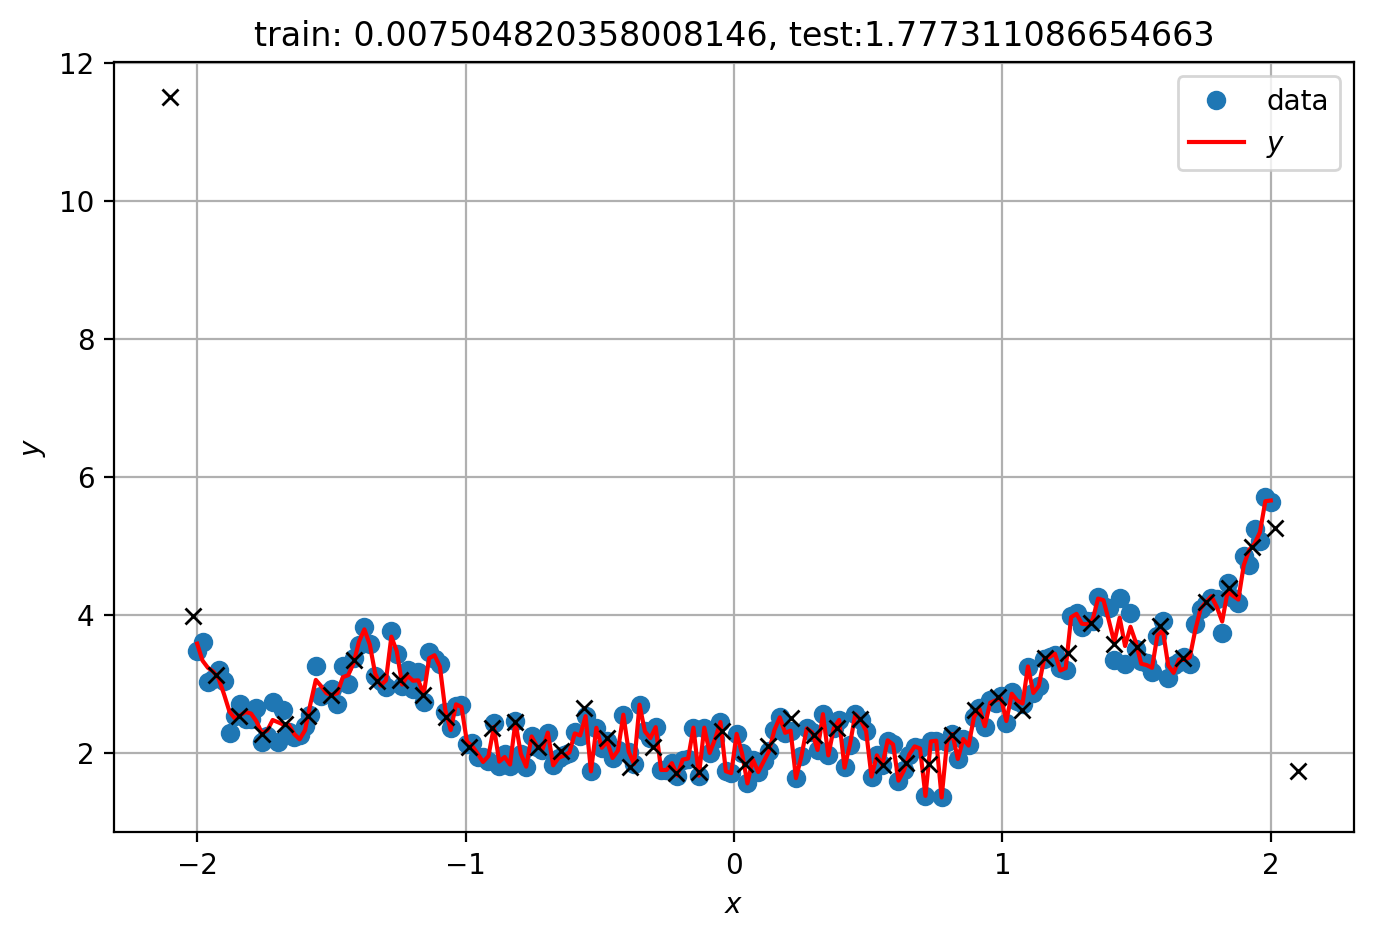

In [20]:
yhat_= model(features)
yhat2 = model(x_test.reshape(-1,1))
loss2 = loss(y_test.reshape(-1,1),yhat2.numpy())
ax = plt.subplots(figsize=(8,5))
plt.plot(x_train, y_train, 'o')
plt.plot(features, yhat_.numpy(), 'r')
plt.plot(x_test.reshape(-1,1), yhat2.numpy(), 'kx')

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('train: {}, test:{}'.format(history.history['loss'][-1],loss2))
plt.legend(['data', '$y$'])